In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\ronrn\Desktop\MBA\data science\final project\laptops.csv', encoding='latin-1')
df.head(10)

,Product,Inches,Ram,Memory,OpSys,Weight,Price_euros
0,MacBook Pro,13.3,8GB,128GB SSD,macOS,1.37kg,1339.69
1,Macbook Air,13.3,8GB,128GB Flash Storage,macOS,1.34kg,898.94
2,250 G6,15.6,8GB,256GB SSD,No OS,1.86kg,575.00
3,MacBook Pro,15.4,16GB,512GB SSD,macOS,1.83kg,2537.45
4,MacBook Pro,13.3,8GB,256GB SSD,macOS,1.37kg,1803.60
5,Aspire 3,15.6,4GB,500GB HDD,Windows 10,2.1kg,400.00
6,MacBook Pro,15.4,16GB,256GB Flash Storage,Mac OS X,2.04kg,2139.97
7,Macbook Air,13.3,8GB,256GB Flash Storage,macOS,1.34kg,1158.70
8,ZenBook UX430UN,14.0,16GB,512GB SSD,Windows 10,1.3kg,1495.00
9,Swift 3,14.0,8GB,256GB SSD,Windows 10,1.6kg,770.00


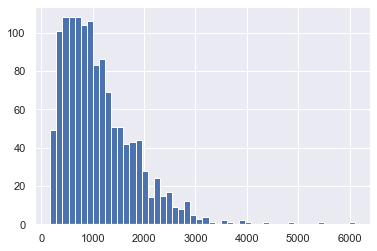

In [3]:
df.Price_euros.hist(bins=50)

In [4]:
df.Price_euros.describe()

count    1303.000000
mean     1123.686992
std       699.009043
min       174.000000
25%       599.000000
50%       977.000000
75%      1487.880000
max      6099.000000
Name: Price_euros, dtype: float64

In [5]:
df['Ram'] = df['Ram'].replace('[GB]', '', regex=True)
df['Ram'] = pd.to_numeric(df['Ram'])
df.rename(columns={'Ram':'Ram_GB'}, inplace=True)
df['Weight'] = df['Weight'].replace('[kg]', '', regex=True)
df['Weight'] = pd.to_numeric(df['Weight'])
df.rename(columns={'Weight':'Weight_Kg'}, inplace=True)
split_mem = df['Memory'].str.split(' ', 1, expand=True)
split_mem
df['Memory_Type'] = split_mem[1]
df['Memory'] = split_mem[0]
df_mem= df['Memory'].str.split('(\d+)',  expand=True)
df['Memory'] = pd.to_numeric(df_mem[1])
df.rename(columns={'Memory':'Memory (GB or TB)'}, inplace=True)
df['Memory (GB or TB)'].unique()
df[df['Memory (GB or TB)'] == 8]
def mem(x):
    if x == 1:
        return 1024
    elif x == 2:
        return 2048
df['Memory (GB or TB)'] = df['Memory (GB or TB)'].apply(lambda x: 1024 if x==1 else x)
df['Memory (GB or TB)'] = df['Memory (GB or TB)'].apply(lambda x: 2048 if x==2 else x)
df.rename(columns={'Memory (GB or TB)':'Memory_GB'}, inplace=True)
df.rename(columns={'Price_euros':'Price_Euros'}, inplace=True)

In [6]:
df.head(10)

,Product,Inches,Ram_GB,Memory_GB,OpSys,Weight_Kg,Price_Euros,Memory_Type
0,MacBook Pro,13.3,8,128,macOS,1.37,1339.69,SSD
1,Macbook Air,13.3,8,128,macOS,1.34,898.94,Flash Storage
2,250 G6,15.6,8,256,No OS,1.86,575.00,SSD
3,MacBook Pro,15.4,16,512,macOS,1.83,2537.45,SSD
4,MacBook Pro,13.3,8,256,macOS,1.37,1803.60,SSD
5,Aspire 3,15.6,4,500,Windows 10,2.10,400.00,HDD
6,MacBook Pro,15.4,16,256,Mac OS X,2.04,2139.97,Flash Storage
7,Macbook Air,13.3,8,256,macOS,1.34,1158.70,Flash Storage
8,ZenBook UX430UN,14.0,16,512,Windows 10,1.30,1495.00,SSD
9,Swift 3,14.0,8,256,Windows 10,1.60,770.00,SSD


# Price - OpSys

Text(0, 0.5, 'Price_Euros')

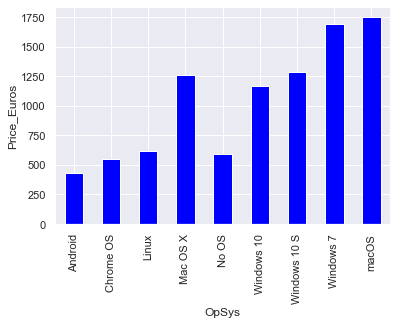

In [7]:
mean_weight_by_position = df.groupby(['OpSys'])['Price_Euros'].mean()
ax = mean_weight_by_position.plot.bar(color="blue")
ax.set_ylabel('Price_Euros')

# Price - Memory Type

Text(0, 0.5, 'Price_Euros')

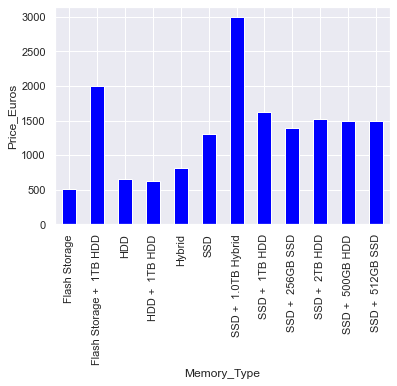

In [8]:
mean_weight_by_position = df.groupby(['Memory_Type'])['Price_Euros'].mean()
ax = mean_weight_by_position.plot.bar(color="blue")
ax.set_ylabel('Price_Euros')

# Price - Memory GB

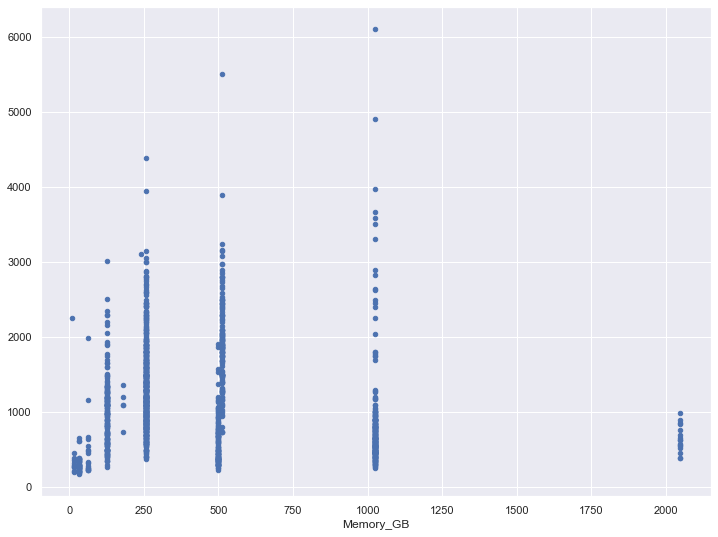

In [9]:
plt.figure(figsize=(12,9))
plt.scatter(df['Memory_GB'],df['Price_Euros'],s=20)
plt.xlabel('Price_Euros'), plt.xlabel('Memory_GB')
plt.show()

Text(0, 0.5, 'Price_Euros')

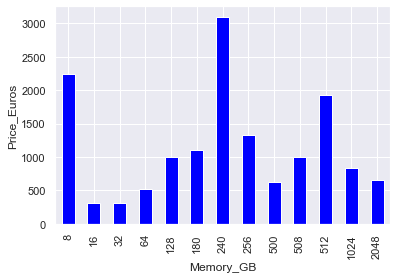

In [10]:
mean_weight_by_position = df.groupby(['Memory_GB'])['Price_Euros'].mean()
ax = mean_weight_by_position.plot.bar(color="blue")
ax.set_ylabel('Price_Euros')

In [11]:
import statsmodels.formula.api as smf
smf_model = smf.ols(formula='Price_Euros ~ Memory_GB',data=df)
results = smf_model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Euros   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     20.77
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           5.66e-06
Time:                        09:19:59   Log-Likelihood:                -10372.
No. Observations:                1303   AIC:                         2.075e+04
Df Residuals:                    1301   BIC:                         2.076e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1230.8937     30.375     40.523      0.0

# Price - RAM

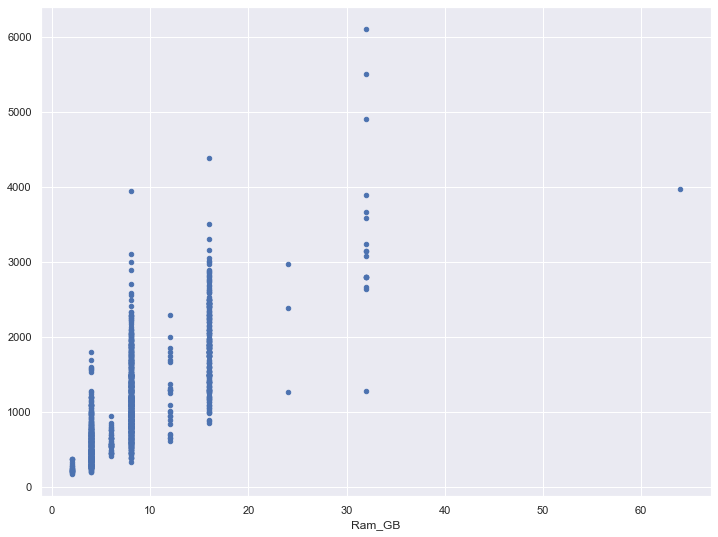

In [12]:
plt.figure(figsize=(12,9))
plt.scatter(df['Ram_GB'],df['Price_Euros'],s=20)
plt.xlabel('Price_Euros'), plt.xlabel('Ram_GB')
plt.show()

Text(0, 0.5, 'Price_Euros')

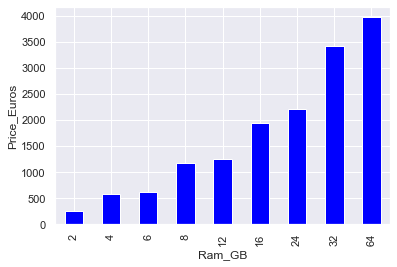

In [13]:
mean_weight_by_position = df.groupby(['Ram_GB'])['Price_Euros'].mean()
ax = mean_weight_by_position.plot.bar(color="blue")
ax.set_ylabel('Price_Euros')

In [14]:
smf_model = smf.ols(formula='Price_Euros ~ Ram_GB',data=df)
results = smf_model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Euros   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     1603.
Date:                Sat, 28 Aug 2021   Prob (F-statistic):          3.91e-229
Time:                        09:20:00   Log-Likelihood:                -9859.4
No. Observations:                1303   AIC:                         1.972e+04
Df Residuals:                    1301   BIC:                         1.973e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    267.4949     25.006     10.697      0.0

# Price - Inches

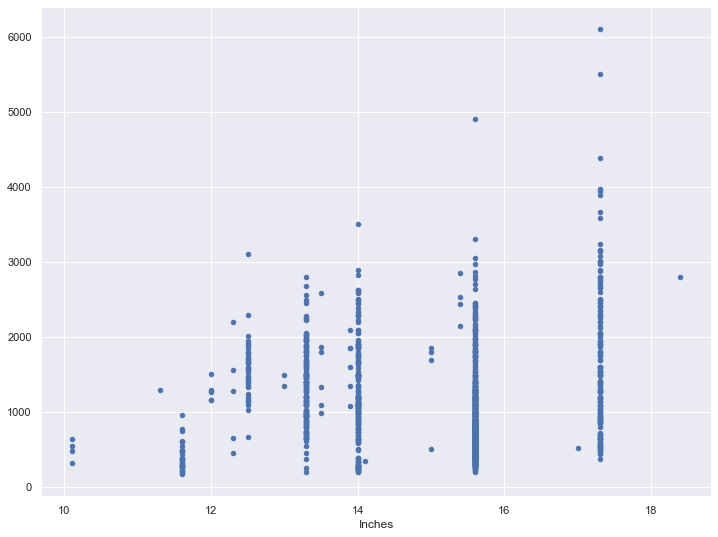

In [15]:
plt.figure(figsize=(12,9))
plt.scatter(df['Inches'],df['Price_Euros'],s=20)
plt.xlabel('Price_Euros'), plt.xlabel('Inches')
plt.show()

In [16]:
smf_model = smf.ols(formula='Price_Euros ~ Inches',data=df)
results = smf_model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Euros   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     6.079
Date:                Sat, 28 Aug 2021   Prob (F-statistic):             0.0138
Time:                        09:20:01   Log-Likelihood:                -10380.
No. Observations:                1303   AIC:                         2.076e+04
Df Residuals:                    1301   BIC:                         2.077e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    621.7808    204.483      3.041      0.0

# Price - Weight

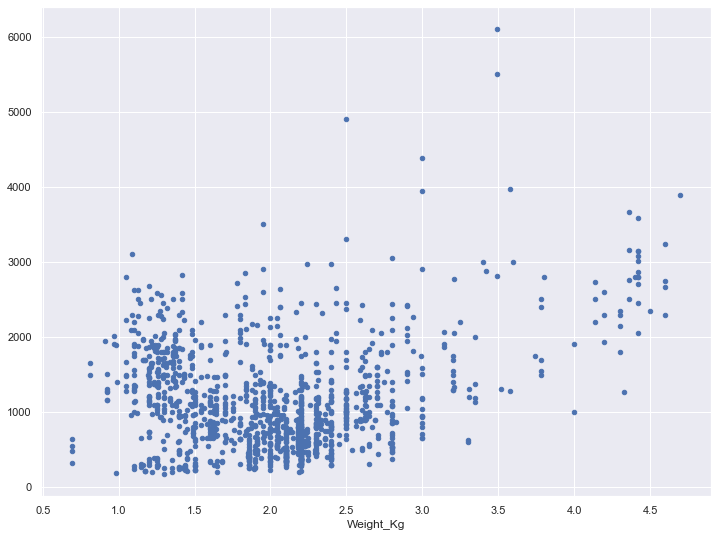

In [17]:
plt.figure(figsize=(12,9))
plt.scatter(df['Weight_Kg'],df['Price_Euros'],s=20)
plt.xlabel('Price_Euros'), plt.xlabel('Weight_Kg')
plt.show()

In [18]:
smf_model = smf.ols(formula='Price_Euros ~ Weight_Kg',data=df)
results = smf_model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Euros   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     60.24
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           1.69e-14
Time:                        09:20:02   Log-Likelihood:                -10353.
No. Observations:                1303   AIC:                         2.071e+04
Df Residuals:                    1301   BIC:                         2.072e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    673.1866     61.054     11.026      0.0

# Combined

In [19]:
smf_model = smf.ols(formula='Price_Euros ~ Memory_GB + Ram_GB + Inches + Weight_Kg',data=df)
results = smf_model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Euros   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     442.7
Date:                Sat, 28 Aug 2021   Prob (F-statistic):          1.14e-240
Time:                        09:20:02   Log-Likelihood:                -9822.0
No. Observations:                1303   AIC:                         1.965e+04
Df Residuals:                    1298   BIC:                         1.968e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1035.0216    189.902      5.450      0.0

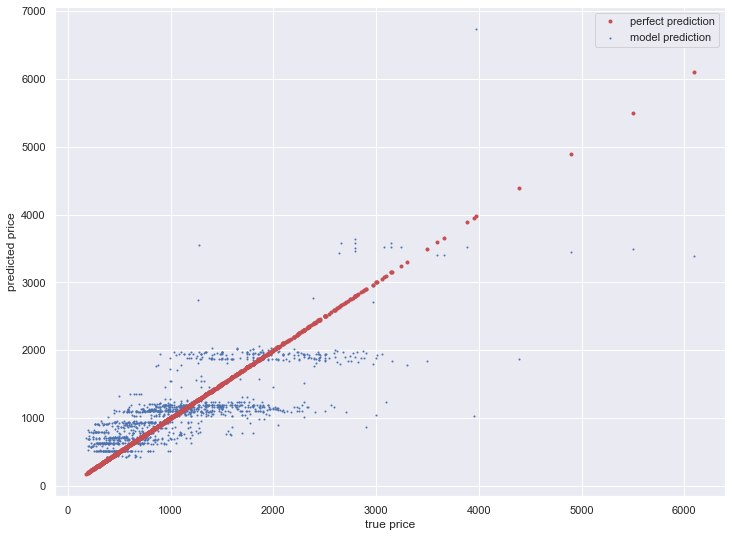

In [20]:
import statsmodels.formula.api as smf
formula = '''Price_Euros ~ 
    Inches + Ram_GB + Memory_GB + 
    Weight_Kg
'''
smf_model_full = smf.ols(formula=formula,data=df)
ols_full_res = smf_model_full.fit()
plt.figure(figsize=(12,9))
plt.scatter(df['Price_Euros'], ols_full_res.predict(df),s=1, label='model prediction')
plt.plot(df['Price_Euros'],df['Price_Euros'],'.r', label='perfect prediction')
plt.xlabel('true price');plt.ylabel('predicted price'); plt.legend()